<a href="https://colab.research.google.com/github/KatlegoMashile/Heart-Disease-/blob/main/Heart_Disease_SA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEART DISEASE SA PREDICTIONS

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

* sbp		systolic blood pressure

* tobacco		cumulative tobacco (kg)

* ldl		low densiity lipoprotein cholesterol

* adiposity
*famhist		family history of heart disease (Present, Absent)
*typea		type-A behavior
*obesity
*alcohol		current alcohol consumption
*age		age at onset
*chd		response, coronary heart disease


In [1]:
#Import Modules
import numpy as np   #Linear algera Library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
sns.set()  #setting seaborn as default 
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ DATA
df = pd.read_csv("/content/Heart_Disease_SA.csv", delimiter=",", low_memory=False)
#df.head()
df.shape

(462, 11)

In [3]:
df.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [4]:
df.corr()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,-0.063808,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


# EXPLORE DATA

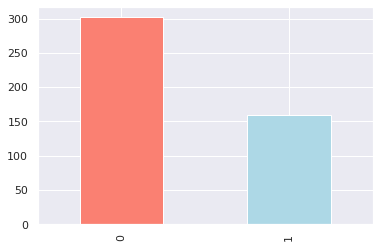

In [5]:
#Number of people affected and not affected by the Heart disease in SA
df.chd.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
# Checking for missing values
df.isna().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [7]:
# Explore type of data and feature names
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


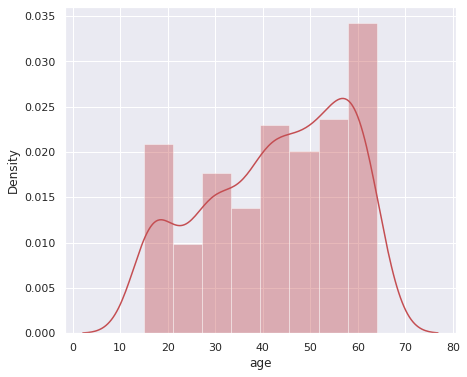

In [8]:
fig, ax = plt.subplots(figsize=(7,6))
sns.distplot(df["age"], color="r");

# SPLIT AND TRAIN THE MODEL

In [9]:
# Checking for missing values
df.isna().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [23]:
#features(X) and responds(y)
X = df.iloc[:, np.r_[1:5,6:10]]
y = df.iloc[:,10]

In [24]:
X.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49


In [25]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

In [26]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array

y = np.ravel(y)

In [27]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Scale data
scaler = StandardScaler()  

# Remember to fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [28]:
logm=LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression()

In [29]:
predictions=logm.predict(X_test)

print( predictions)

# Accuracy before model parameter optimisation
accuracy_score(predictions,y_test)

[0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0]


0.6810344827586207

In [30]:
print(logm.score(X_train,y_train))

0.7485549132947977


In [31]:
print("Accuracy Score:",logm.score(X_train,y_train))

Accuracy Score: 0.7485549132947977


In [32]:
import math
from sklearn import metrics

#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.31896551724137934
Mean squared value: 0.31896551724137934
root mean squared error value: 0.5647703225572138


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.86      0.78        74
           1       0.60      0.36      0.45        42

    accuracy                           0.68       116
   macro avg       0.65      0.61      0.61       116
weighted avg       0.67      0.68      0.66       116



# CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix
    
cm=confusion_matrix(y_test,predictions)

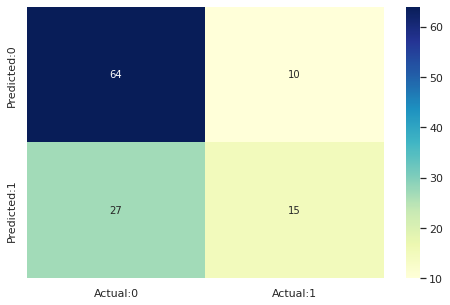

In [35]:
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:0','Actual:1'],index=['Predicted:0','Predicted:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#sns.heatmap(
#    confusion_matrix(
#        y_test, predictions
#    ), annot = True
#)